In [26]:
import pandas as pd
import numpy as np
import re
from sklearn.ensemble import IsolationForest

# Load data into a DataFrame
df = pd.read_csv("C:\\Users\\admin\\Downloads\\datasetnet.csv")


# Function to extract features from the 'Info' column
def extract_features(info):
    
    # Extracting flags (ACK, SYN, FIN)
    flag = 0
    if '[ACK]' in info:
        flag = 1
    elif '[SYN]' in info:
        flag = 2
    elif '[FIN]' in info:
        flag = 3
    
    # Extracting sequence and acknowledgment numbers
    seq_match = re.search(r'Seq=(\d+)', info)
    ack_match = re.search(r'Ack=(\d+)', info)
    seq_num = int(seq_match.group(1)) if seq_match else 0
    ack_num = int(ack_match.group(1)) if ack_match else 0
    
    # Extracting window size and length
    win_match = re.search(r'Win=(\d+)', info)
    len_match = re.search(r'Len=(\d+)', info)
    window_size = int(win_match.group(1)) if win_match else 0
    length = int(len_match.group(1)) if len_match else 0
    
    return [flag, seq_num, ack_num, window_size, length]

# Apply the extraction function to the 'Info' column
features = df['Info'].apply(extract_features)

# Create a new DataFrame with the extracted features
features_df = pd.DataFrame(features.tolist(), columns=[
    'Flag', 'Seq_Num', 'Ack_Num', 'Window_Size', 'Payload'
])

# Combine the features with the original DataFrame
df = pd.concat([df, features_df], axis=1)

# Display the final DataFrame
#print(df)
print(df)




       No.        Time                 Source      Destination Protocol  \
0        1    0.000000           172.16.41.12  142.251.175.188      TCP   
1        2    0.001900        142.251.175.188     172.16.41.12      TCP   
2        3    0.295966         Intel_04:40:fc        Broadcast      ARP   
3        4    0.772884           172.16.41.12          8.8.4.4      TCP   
4        5    0.775291                8.8.4.4     172.16.41.12      TCP   
...    ...         ...                    ...              ...      ...   
5067  5068  191.379298         Intel_04:40:fc        Broadcast      ARP   
5068  5069  191.379298                0.0.0.0  255.255.255.255     DHCP   
5069  5070  191.780881         Intel_04:40:fc        Broadcast      ARP   
5070  5071  191.882909  CloudNetwork_0e:88:53        Broadcast      ARP   
5071  5072  192.191296         Intel_04:40:fc        Broadcast      ARP   

      Length                                               Info  Flag  \
0         55      49969  >

In [78]:
data= df[['Length']]
# Initialize IsolationForest
iso_forest = IsolationForest(contamination=0.01)  # Contamination is the expected proportion of anomalies

# Fit the model
iso_forest.fit(data)


IsolationForest(contamination=0.01)

In [80]:
# Predict anomalies
predictions = iso_forest.predict(data)

# Add predictions as a new column in the DataFrame
df['Anomaly'] = predictions


In [82]:
# Filter and view rows that are anomalies
anomalies = df[df['Anomaly'] == -1]
print(anomalies)


       No.        Time           Source    Destination Protocol  Length  \
58      59   11.862534     172.16.41.12   104.18.32.47  TLSv1.2    5115   
177    178   28.841660     172.16.41.12   104.18.32.47  TLSv1.2    5054   
191    192   28.905108     172.16.41.12   104.18.32.47  TLSv1.2    6186   
193    194   28.905710     172.16.41.12   104.18.32.47  TLSv1.2    6194   
194    195   28.905857     172.16.41.12   104.18.32.47  TLSv1.2    6162   
196    197   28.906294     172.16.41.12   104.18.32.47  TLSv1.2    6176   
197    198   28.906417     172.16.41.12   104.18.32.47  TLSv1.2    6170   
198    199   28.911212     172.16.41.12   104.18.32.47  TLSv1.2    5054   
223    224   29.343996     104.18.32.47   172.16.41.12  TLSv1.2     858   
229    230   29.379754     104.18.32.47   172.16.41.12  TLSv1.2     862   
240    241   29.463846     172.16.41.12   104.18.32.47  TLSv1.2    5055   
249    250   29.593714     104.18.32.47   172.16.41.12  TLSv1.2     778   
304    305   30.456224   

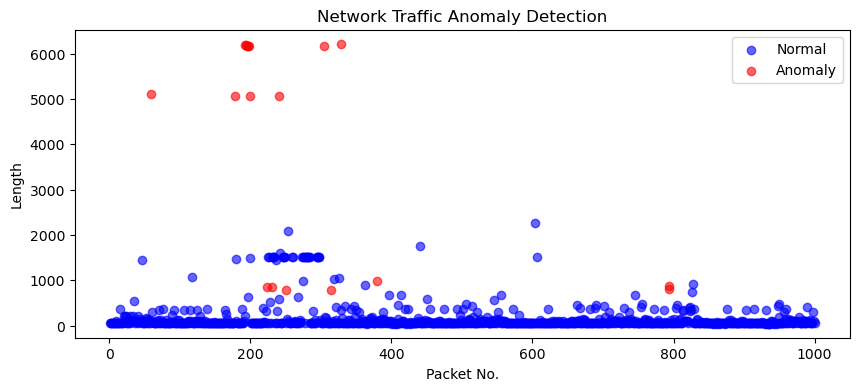

In [100]:

import matplotlib.pyplot as plt

# Plot anomalies: Anomalies (-1) in red, Normal (1) in blue
plt.figure(figsize=(10, 4))
df_head=df.head(1000)
# Plotting normal points
plt.scatter(df_head[df_head['Anomaly'] == 1]['No.'], df_head[df_head['Anomaly'] == 1]['Length'], color='blue', label='Normal',linestyle='-', alpha=0.6)

# Plotting anomalies
plt.scatter(df_head[df_head['Anomaly'] == -1]['No.'], df_head[df_head['Anomaly'] == -1]['Length'], color='red', label='Anomaly', alpha=0.6)

# Labels and title
plt.title("Network Traffic Anomaly Detection")
plt.xlabel("Packet No.")
plt.ylabel("Length")
plt.legend()

# Show the plot
plt.show()
